# Spotify Song Recommendation System

Intent: Make an application that will take in a song as an input and output similar recommendations

Keywords: Machine Learning, Data Science, Recommendation Systems 

### About the Dataset

The data is uploaded to kaggle by Gautham Vijayaraj.

https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week/data

It covers metadata of over 60,000 Spotify tracks ranging over 6 different language - English, Hindi, Tamil, Telugu, Malayalam and Korean.

## Setup
Setting up all dependencies

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use("ggplot")

### Helper Functions

In [2]:
# helpers for this 
from IPython.display import HTML, display

def qq(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"black"}; padding:0px;">Q: {text}</div>'))

def objective(text):
    display(HTML(f'<h3><div style=";">{text}</h3>'))


def nts(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Prompt : {text}</div>'))

def observation(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Observation: {text}</div>'))    

def finding(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:normal; color:{"blue"}; background-color:{"white"};">Findings: {text}</div>'))    

def conclusion(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"white"}; background-color:{"green"}; padding:10px;">Result: {text}</div>'))    
    
def aha(text):
    display(HTML(f'<div style="font-size:{13}px; font-weight:bold; color:{"blue"}; background-color:{"yellow"}; padding:10px;">{text}</div>'))

## Loading the .csv + Basic Modification

### Loading- Import .csv

In [3]:
path_to_dataset=r"E:\Datasets\SpotifyTracks\spotify_tracks.csv"

df=pd.read_csv(path_to_dataset)
display(df.head(5))

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


### Loading- Check number of rows and colums

In [4]:
n_rows,n_cols=df.shape
df.info()

finding(f"There are {n_rows} datapoints. {n_cols} raw features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

### Delete duplicate rows

In [5]:
#### Data cleaning- Taking the risk to modify data
#objective("Check for duplicate rows")

duplicates= df[df.duplicated()] 

display(duplicates)

finding(f"Found {duplicates.shape[0]} duplicate rows.")

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
2495,50RcuWjfUcoJfWMNegXF0b,"Ee Raathale (From ""Radhe Shyam"")","Yuvan Shankar Raja, Harini Ivaturi, Justin Pra...",2021,57,https://i.scdn.co/image/ab67616d0000b273c01ce9...,"Ee Raathale (From ""Radhe Shyam"")",0.0284,0.630,232763.0,...,9.0,0.1070,-8.574,0.0,0.0311,124.000,4.0,0.551,https://open.spotify.com/track/50RcuWjfUcoJfWM...,Tamil
2496,5zDRx2IlpoiNHBpmG4btVN,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")","Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,51,https://i.scdn.co/image/ab67616d0000b27377e32a...,"Per Vachaalum Vaikkaama (From ""Dikkiloona"")",0.3050,0.761,268400.0,...,9.0,0.0603,-4.049,1.0,0.1150,74.995,4.0,0.926,https://open.spotify.com/track/5zDRx2IlpoiNHBp...,English
2497,3huCRjAX12zNPxtX9JqX2X,"Naanga Vera Maari (From ""Valimai"")","Yuvan Shankar Raja, Anurag Kulkarni",2021,52,https://i.scdn.co/image/ab67616d0000b273fba530...,"Naanga Vera Maari (From ""Valimai"")",0.1020,0.649,254345.0,...,1.0,0.3230,-5.442,1.0,0.1990,149.949,4.0,0.601,https://open.spotify.com/track/3huCRjAX12zNPxt...,Tamil
2498,21r0QnhYxsxYUsoov5o0IF,Per Vachaalum Vaikkaama,"Yuvan Shankar Raja, Ilaiyaraaja, Malaysia Vasu...",2021,47,https://i.scdn.co/image/ab67616d0000b2736dd803...,Dikkiloona (Original Motion Picture Soundtrack),0.3020,0.754,268400.0,...,9.0,0.0582,-4.049,1.0,0.1180,75.009,4.0,0.929,https://open.spotify.com/track/21r0QnhYxsxYUso...,English
2499,42LMjL86cep0L8QA1q0doE,Voice Of Unity,"Yuvan Shankar Raja, Silambarasan TR, Arivu",2021,43,https://i.scdn.co/image/ab67616d0000b273fe1d00...,Maanaadu (Original Motion Picture Soundtrack),0.0594,0.632,238400.0,...,6.0,0.1740,-6.415,1.0,0.1300,149.951,4.0,0.336,https://open.spotify.com/track/42LMjL86cep0L8Q...,Tamil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,2sYIrPDAeu3i9vlVrofwvh,"Harla Farla (From ""Chakra (Telugu)"")","Yuvan Shankar Raja, Ranjith Govind, Sanjana Ka...",2020,1,https://i.scdn.co/image/ab67616d0000b273e32f5f...,"Harla Farla (From ""Chakra (Telugu)"")",0.2590,0.758,206796.0,...,0.0,0.0728,-5.569,1.0,0.0628,97.997,4.0,0.319,https://open.spotify.com/track/2sYIrPDAeu3i9vl...,Telugu
2569,0DqKN7Wg0lsQaf6MuaREpX,Munnala Ninna Pothum,"Yuvan Shankar Raja, Saindhavi, Sunandan",2020,4,https://i.scdn.co/image/ab67616d0000b2734ae5bd...,Dabangg 3,0.2700,0.496,246625.0,...,9.0,0.1390,-3.419,1.0,0.1120,128.921,4.0,0.848,https://open.spotify.com/track/0DqKN7Wg0lsQaf6...,Tamil
2570,7jSXMBdFfshfffYQmWWbHz,"Maari Gethu (From ""Maari 2"")","Yuvan Shankar Raja, Dhanush, V.M. Mahalingam, ...",2020,0,https://i.scdn.co/image/ab67616d0000b27320428b...,U1 For Life,0.1440,0.721,226297.0,...,0.0,0.5280,-8.840,1.0,0.0578,92.468,4.0,0.694,https://open.spotify.com/track/7jSXMBdFfshfffY...,Tamil
2571,6DVTHHdDFEnL9UcDaLSCvg,Suttute Suttute,Yuvan Shankar Raja,2020,0,https://i.scdn.co/image/ab67616d0000b2732ace61...,Preethiya Payana (Original Motion Picture Soun...,0.4370,0.846,280676.0,...,1.0,0.1640,-11.122,1.0,0.0717,125.014,4.0,0.635,https://open.spotify.com/track/6DVTHHdDFEnL9Uc...,Tamil


In [6]:
#objective("Delete duplicate rows and recalculate rows and columns")
df.drop_duplicates(inplace=True)

df.info()

finding(f"new shape is {df.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62239 non-null  object 
 1   track_name        62239 non-null  object 
 2   artist_name       62239 non-null  object 
 3   year              62239 non-null  int64  
 4   popularity        62239 non-null  int64  
 5   artwork_url       62239 non-null  object 
 6   album_name        62239 non-null  object 
 7   acousticness      62239 non-null  float64
 8   danceability      62239 non-null  float64
 9   duration_ms       62239 non-null  float64
 10  energy            62239 non-null  float64
 11  instrumentalness  62239 non-null  float64
 12  key               62239 non-null  float64
 13  liveness          62239 non-null  float64
 14  loudness          62239 non-null  float64
 15  mode              62239 non-null  float64
 16  speechiness       62239 non-null  float64
 17

### Reset Index 

In [7]:
#objective("Fix the primary key for indexing. Im leaving index= row number default as it is for now.")

### Find missing values

The dataset mentions that value '-1' is missing data. 
Therefore, we replace it with NaN.

In [8]:
temp=df.replace(-1, np.nan)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62239 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62239 non-null  object 
 1   track_name        62239 non-null  object 
 2   artist_name       62239 non-null  object 
 3   year              62239 non-null  int64  
 4   popularity        62239 non-null  int64  
 5   artwork_url       62239 non-null  object 
 6   album_name        62239 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62239 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62239 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

We end up with 62204 notna entries out of 62317 (36 missing).

In [9]:
# only 35 missing values in 62000, so delete
df=df.replace(-1,np.nan).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62204 non-null  object 
 1   track_name        62204 non-null  object 
 2   artist_name       62204 non-null  object 
 3   year              62204 non-null  int64  
 4   popularity        62204 non-null  int64  
 5   artwork_url       62204 non-null  object 
 6   album_name        62204 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62204 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62204 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

### Rename columns to meaningful names
Include measurement units if relevant eg: 'height_cm' not 'height'
In our case, the columns are already labelled well.

## Data Exploration
Get an intuitive understanding on 
- what kind of data we have
- the size of data
- types of data (numerical? categorical? binary? ordinal? temporal? none of them?),
- brainstorming and developing insights.
- How dependable and trustable is the dataset? Understanding the dataset credibility (source of truth- truth by alignment with domain knowledge, truth by redundancy)
-- (by understanding how datapoints were collected, we can reason the dataset's credibility)

### DE- What features are available?

In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62204 non-null  object 
 1   track_name        62204 non-null  object 
 2   artist_name       62204 non-null  object 
 3   year              62204 non-null  int64  
 4   popularity        62204 non-null  int64  
 5   artwork_url       62204 non-null  object 
 6   album_name        62204 non-null  object 
 7   acousticness      62204 non-null  float64
 8   danceability      62204 non-null  float64
 9   duration_ms       62204 non-null  float64
 10  energy            62204 non-null  float64
 11  instrumentalness  62204 non-null  float64
 12  key               62204 non-null  float64
 13  liveness          62204 non-null  float64
 14  loudness          62204 non-null  float64
 15  mode              62204 non-null  float64
 16  speechiness       62204 non-null  float64
 17

None

### DE- Interpreting the datatypes of available features

On close inspection, most among the 22 given features can be placed in the following buckets- categorical, ordinal, binary, numeric continuous, numeric discrete, and remaining are typically useless for model training (eg: index related columns like track_id,cust_id)

In [11]:
'''
# Programmatic Guessing
df_categorical_cols=df.select_dtypes(include=["string","object"]).columns.tolist()
df_binary_cols=[col for col in df.columns if df[col].nunique() == 2]
df_ordinal_cols=[col for col in df.columns if df[col].nunique() < 10]
df_numeric_cols=df.select_dtypes(include=["number"]).columns.tolist()

aha("Programmatic Guess")

print(f"categorical_features={df_categorical_cols}")
print(f"ordinal_features={df_ordinal_cols}")
print(f"binary_features={df_binary_cols}")
print(f"numeric_features={df_numeric_cols}")
print(f"numericdiscrete_features=[]")
print(f"useless_features=[]")
'''


'\n# Programmatic Guessing\ndf_categorical_cols=df.select_dtypes(include=["string","object"]).columns.tolist()\ndf_binary_cols=[col for col in df.columns if df[col].nunique() == 2]\ndf_ordinal_cols=[col for col in df.columns if df[col].nunique() < 10]\ndf_numeric_cols=df.select_dtypes(include=["number"]).columns.tolist()\n\naha("Programmatic Guess")\n\nprint(f"categorical_features={df_categorical_cols}")\nprint(f"ordinal_features={df_ordinal_cols}")\nprint(f"binary_features={df_binary_cols}")\nprint(f"numeric_features={df_numeric_cols}")\nprint(f"numericdiscrete_features=[]")\nprint(f"useless_features=[]")\n'

In [12]:
#objective("understand the datatypes of features")
df.columns

Index(['track_id', 'track_name', 'artist_name', 'year', 'popularity',
       'artwork_url', 'album_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'track_url', 'language'],
      dtype='object')

In [13]:
#MANUAL INTERVENTION

categorical_features= ['artist_name','album_name','language'] # artist_name is composite...
ordinal_features= ['key', 'time_signature',"mode"]
binary_features= []
numeric_features= ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness', 'speechiness', 'tempo', 'valence']
numericdiscrete_features= ['year','popularity']
useless_features= ['track_id','track_name', 'artwork_url', 'track_url']
#datetime_features=[]

In [14]:
df[categorical_features].sample(5,random_state=10)

,artist_name,album_name,language
23690,Taylor Swift,Will you be my valentine?,English
47043,Billy Joel,Coronation Celebration,English
59884,"Alejandro Sanz, Shakira",El tren de los momentos (Edición Especial),English
54476,"The Blessed Madonna, Clementine Douglas",Top Tracks Pop,English
43729,"Linkin Park, Steve Aoki, Brian Yates",A LIGHT THAT NEVER COMES REMIX,English


In [15]:
df[ordinal_features].sample(5,random_state=10)

,key,time_signature,mode
23690,7.0,4.0,1.0
47043,4.0,4.0,1.0
59884,2.0,4.0,1.0
54476,0.0,4.0,1.0
43729,7.0,4.0,0.0


In [16]:
df[numeric_features].sample(5,random_state=10)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
23690,0.4920,0.359,221307.0,0.543,0.000016,0.1180,-7.582,0.0915,68.505,0.453
47043,0.0756,0.700,194880.0,0.943,0.000000,0.7550,-2.961,0.0452,128.988,0.792
59884,0.5620,0.760,273373.0,0.689,0.000000,0.0662,-5.969,0.1030,149.988,0.696
54476,0.0038,0.785,170359.0,0.831,0.010500,0.0860,-3.681,0.0444,126.056,0.673
43729,0.1040,0.587,240703.0,0.848,0.000000,0.0838,-4.279,0.0390,140.051,0.272


In [17]:
df[numericdiscrete_features].sample(5,random_state=10)

,year,popularity
23690,2023,2
47043,2023,7
59884,2007,27
54476,2024,2
43729,2014,23


In [18]:
df[binary_features].sample(5,random_state=10)

""
23690
47043
59884
54476
43729


In [19]:
df[useless_features].sample(5,random_state=10)

#note to future: track_name could be utilitzed if you split the names by space bar and store them as tags

,track_id,track_name,artwork_url,track_url
23690,5PqPxGpzV6yimiN0c3QtrI,Lover,https://i.scdn.co/image/ab67616d0000b273ddfcd0...,https://open.spotify.com/track/5PqPxGpzV6yimiN...
47043,0tB4vTmp13X3m2YNppWpps,Uptown Girl,https://i.scdn.co/image/ab67616d0000b273aa12a3...,https://open.spotify.com/track/0tB4vTmp13X3m2Y...
59884,1f9xh7kwVRTBm9AQFarFd9,"Te lo agradezco, pero no (feat. Shakira)",https://i.scdn.co/image/ab67616d0000b273956285...,https://open.spotify.com/track/1f9xh7kwVRTBm9A...
54476,7zLpDJcJmPuW3431nTp1Wu,Happier (feat. Clementine Douglas),https://i.scdn.co/image/ab67616d0000b27392ca45...,https://open.spotify.com/track/7zLpDJcJmPuW343...
43729,0Jw4Qgid5vZWvknC9pikQr,A LIGHT THAT NEVER COMES REMIX - Brian Yates R...,https://i.scdn.co/image/ab67616d0000b273b9a41f...,https://open.spotify.com/track/0Jw4Qgid5vZWvkn...


---

### Exploring and Understand Numeric Features

In [20]:
df_numerical_data=df[numeric_features]
df_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62204 entries, 0 to 62316
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      62204 non-null  float64
 1   danceability      62204 non-null  float64
 2   duration_ms       62204 non-null  float64
 3   energy            62204 non-null  float64
 4   instrumentalness  62204 non-null  float64
 5   liveness          62204 non-null  float64
 6   loudness          62204 non-null  float64
 7   speechiness       62204 non-null  float64
 8   tempo             62204 non-null  float64
 9   valence           62204 non-null  float64
dtypes: float64(10)
memory usage: 5.2 MB


In [21]:
df_numerical_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0241,0.753,97297.0,0.970,0.055300,0.1000,-5.994,0.1030,110.997,0.459
1,0.0851,0.780,207369.0,0.793,0.000000,0.0951,-5.674,0.0952,164.995,0.821
2,0.0311,0.457,82551.0,0.491,0.000000,0.0831,-8.937,0.1530,169.996,0.598
3,0.2270,0.718,115831.0,0.630,0.000727,0.1240,-11.104,0.4450,169.996,0.362
4,0.0153,0.689,129621.0,0.748,0.000001,0.3450,-9.637,0.1580,128.961,0.593


In [22]:
df_numerical_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,62204.000000,62204.000000,6.220400e+04,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000,62204.000000
mean,0.363108,0.597667,2.427052e+05,0.603318,0.146699,0.194844,-8.945049,0.088353,117.990627,0.496088
std,0.313098,0.182422,1.129582e+05,0.243324,0.306520,0.169775,5.332863,0.112313,28.373053,0.262472
min,0.000000,0.000000,1.002700e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.067300,0.498000,1.923600e+05,0.440000,0.000000,0.093200,-10.720000,0.036700,95.950000,0.293000
50%,0.286000,0.631000,2.363790e+05,0.639000,0.000025,0.125000,-7.505000,0.048900,117.994500,0.508000
75%,0.633000,0.730000,2.863502e+05,0.803000,0.015200,0.243000,-5.454000,0.089125,135.082000,0.710000
max,0.996000,0.986000,4.581483e+06,1.000000,0.999000,0.998000,1.233000,0.959000,239.970000,0.995000


#### DE- 
Visualising Distributions: Violin+Box Plot   

Univariate analysis to understand the spread of datapoints

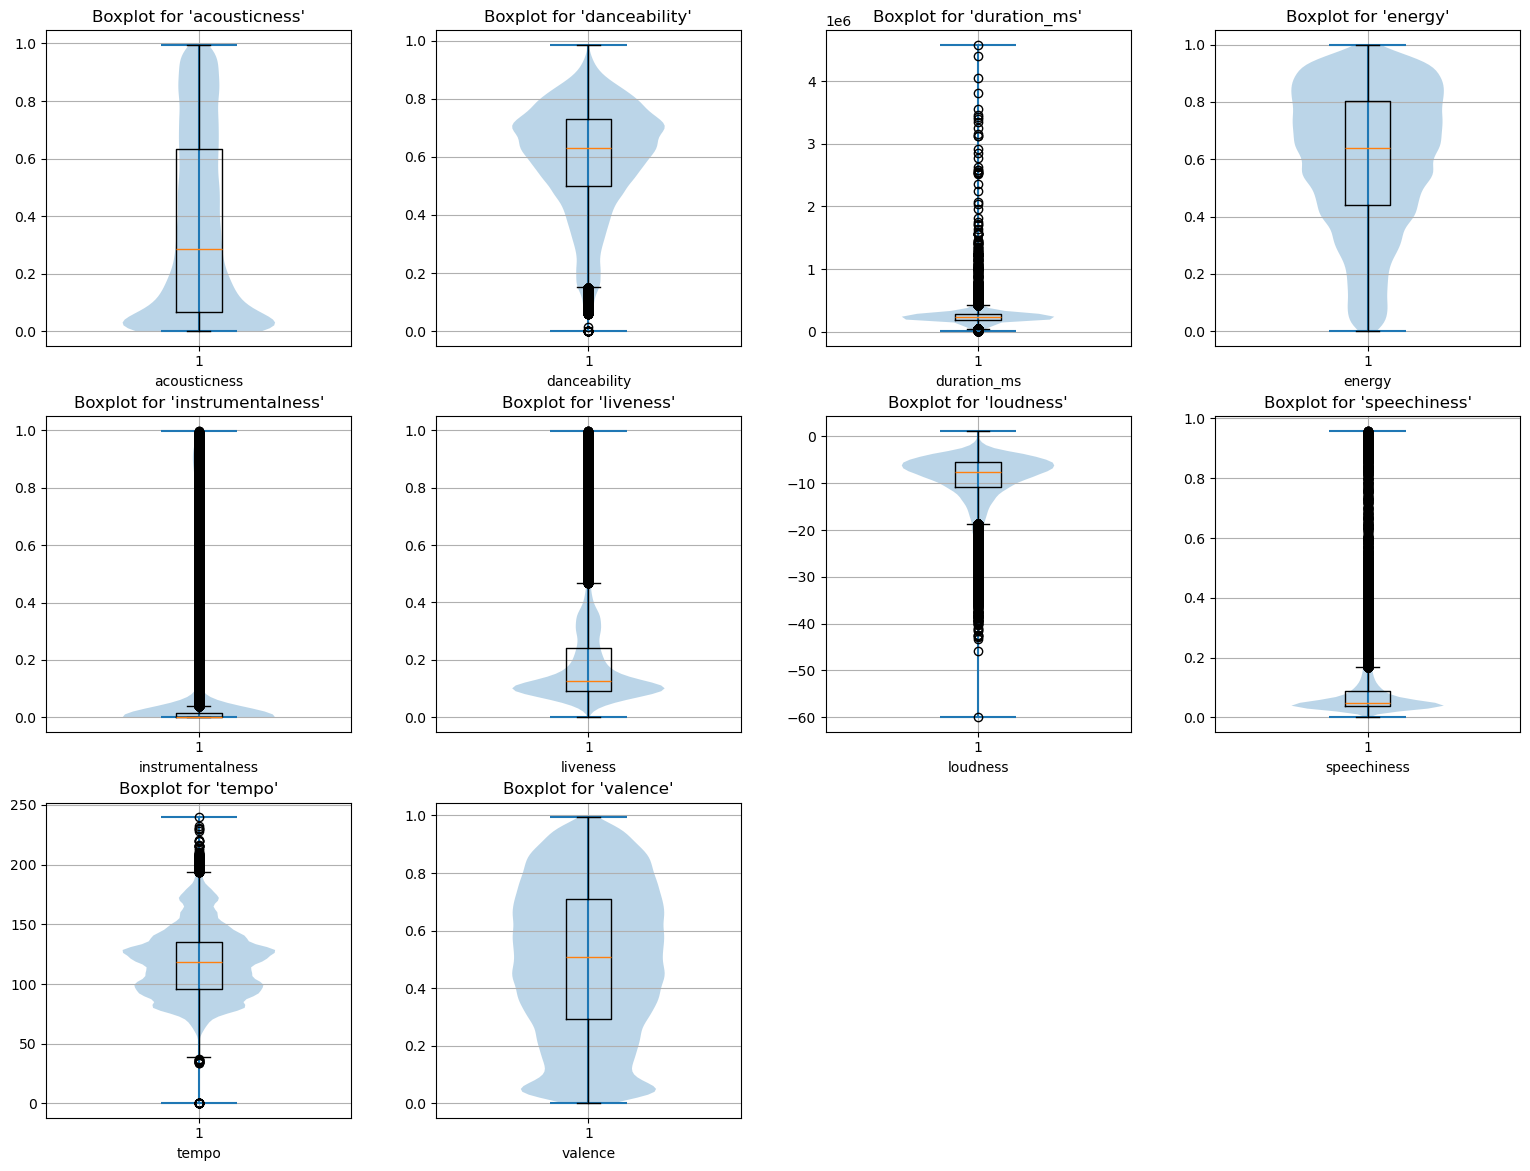

In [23]:

# Set the number of plots per row
plots_per_row = 4
num_columns = len(df_numerical_data.columns)

# Calculate the number of rows required
num_rows = int(np.ceil(num_columns / plots_per_row))

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(4 * plots_per_row, 4 * num_rows))
fig.tight_layout(pad=3.0)  # Adjust padding between subplots

# Flatten axes to handle both cases (grid vs single row/column)
axes = axes.flatten()

# Iterate over the columns and axes
for i, col in enumerate(df_numerical_data.columns):
    ax = axes[i]
    ax.violinplot(df_numerical_data[col], vert=True)
    ax.boxplot(df_numerical_data[col], vert=True)
    ax.set_title(f"Boxplot for '{col}'")
    ax.set_xlabel(col)
    ax.grid()

# Hide any unused subplots
for i in range(len(df_numerical_data.columns), len(axes)):
    axes[i].axis('off')

# Display the plots
plt.show()


#### Insights on manual inspection
##### Insights about the variances for the numerical continuous data points...
> 'acousticness', danceability, energy, tempo and valence seem to spread out well more, indicating they can contribute well for diversity and classification purposes

> duration_ms, instrumentalness, liveness, loudness, speechiness on the other hand seem to be concentrated at locus points; while they be not be primary contributors, they could be secondary level contibutors for more fine-tuned classification, standing on top of the previous features
>

##### Insights on correlation:

> On manual viewing, there seems to be no strong correlation pairwise between the features, indicating all these paramters have the potential to be used for training

In [24]:
'''for col in df_numerical_data.columns:
    plt.figure(figsize=(3,3))
    plt.violinplot(df_numerical_data[col], vert=True)  # Horizontal boxplot
    plt.boxplot(df_numerical_data[col], vert=True)  # Horizontal boxplot
    plt.title(f"Boxplot for '{col}'")  # Title for the plot
    plt.xlabel(col)  # Label for the x-axis
    plt.grid()  # axis='x' Optional: Add gridlines for clarity
    plt.show()

'''

'for col in df_numerical_data.columns:\n    plt.figure(figsize=(3,3))\n    plt.violinplot(df_numerical_data[col], vert=True)  # Horizontal boxplot\n    plt.boxplot(df_numerical_data[col], vert=True)  # Horizontal boxplot\n    plt.title(f"Boxplot for \'{col}\'")  # Title for the plot\n    plt.xlabel(col)  # Label for the x-axis\n    plt.grid()  # axis=\'x\' Optional: Add gridlines for clarity\n    plt.show()\n\n'

#### Ensuring authenticity of the data

Understanding the trustability of features and ensuring the datapoints reflect truth before we proceed with building a model

- creditibility of source- The site claims that the dataset was collected by using spotify's own public web api. Therefore, I assume these features were curated by spotify. Its reasonable to go forward with the notion the data reflects reality, and that 
- handling missing values- The database has already been cleaned of any and all missing values.
- handling outliers- the outliers are naturally part of data distribution and not mistakes.



#### Handling missing values for numerical features
No missing values

In [25]:
'''df_numerical_data.isnull().sum()'''

'df_numerical_data.isnull().sum()'

In [26]:
'''
#visualise missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_numerical_data.isnull())
plt.title("Heatmap of missing values")
plt.show()
'''

'\n#visualise missing values\nplt.figure(figsize=(10,6))\nsns.heatmap(df_numerical_data.isnull())\nplt.title("Heatmap of missing values")\nplt.show()\n'

In [27]:
'''df_numerical_data.isna().sum()'''

'df_numerical_data.isna().sum()'

##### Handling false data (using domain knowledge and common knowledge)
No False data

### Exploring and Understanding the Categorical Features
- What categorical features are available

For each feature, check
- simple or composite
- unique values,
- frequency distribution of unique values (value_count),
- missing data
- false data (eg: outliers)

#### Enlisting the categorical variables
There are 3 categorical variables- artist_name, album_name, and language

Among them:
> artist_name is 'composite'

> album_name and language are 'simple' 

In [28]:
display(categorical_features)

['artist_name', 'album_name', 'language']

In [29]:
df_categorical_data=df[categorical_features]
display(df_categorical_data)

,artist_name,album_name,language
0,Anirudh Ravichander,"Leo Das Entry (From ""Leo"")",Tamil
1,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",AAO KILLELLE,Tamil
2,"Anirudh Ravichander, Anivee, Alvin Bruno",Mayakiriye Sirikiriye (Orchestral EDM),Tamil
3,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",Scene Ah Scene Ah (Experimental EDM Mix),Tamil
4,"Anirudh Ravichander, Benny Dayal, Leon James, ...",Gundellonaa X I Am a Disco Dancer (Mashup),Tamil
...,...,...,...
62312,"Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...",Sani (G.O.A.T Remix),Tamil
62313,"A H Kaashif, Navakkarai Naveen Prabanjam, Asal...",Bachelor (Original Motion Picture Soundtrack),Tamil
62314,"Rakesh Ambigapathy, Asal Kolaar, MC Vickey",Yo Baby,Tamil
62315,"Asal Kolaar, Priyadarshan Balasubramanian",Arjuna Phalguna,Tamil


In [70]:
few_labels_categorical_features=[]
many_labels_categorical_features=[]


for feature in categorical_features:
    if df[feature].nunique()<=15:
        few_labels_categorical_features.append(feature)
    else:
        many_labels_categorical_features.append(feature)

aha("Few labels:")
for feature in few_labels_categorical_features:
    print(f"There are {df[feature].nunique()} labels for '{feature}'")

aha("\nMany labels:")
for feature in many_labels_categorical_features:
    print(f"There are {df[feature].nunique()} labels for '{feature}'")

qq("Note: do evaluate labels these are simple value labels or composite value labels")

There are 7 labels for 'language'


There are 12511 labels for 'artist_name'
There are 19892 labels for 'album_name'


#### Categorical-Few Value Labels: Bar Plot Distribution

#### Understanding 'language' feature
Language is a simple categorical feature

In [71]:
display(df["language"].unique())
display(df["language"].nunique())

array(['Tamil', 'Telugu', 'English', 'Hindi', 'Malayalam', 'Unknown',
       'Korean'], dtype=object)

7

In [72]:
display(df["language"].isnull().sum())

0

In [ ]:
print(df['language'].isnull().sum())

#### Bar plot Visualisation for fewlabel categorical attributes:

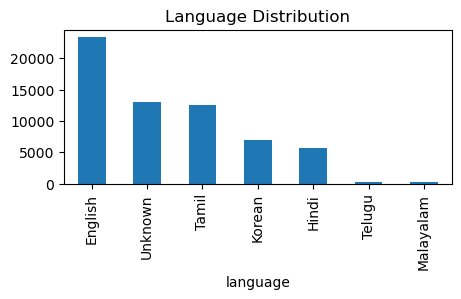

In [73]:
# Bar plot of language distribution
df['language'].value_counts().plot(kind='bar', figsize=(5, 2), title='Language Distribution');

AttributeError: 'Rectangle' object has no attribute 'patches'

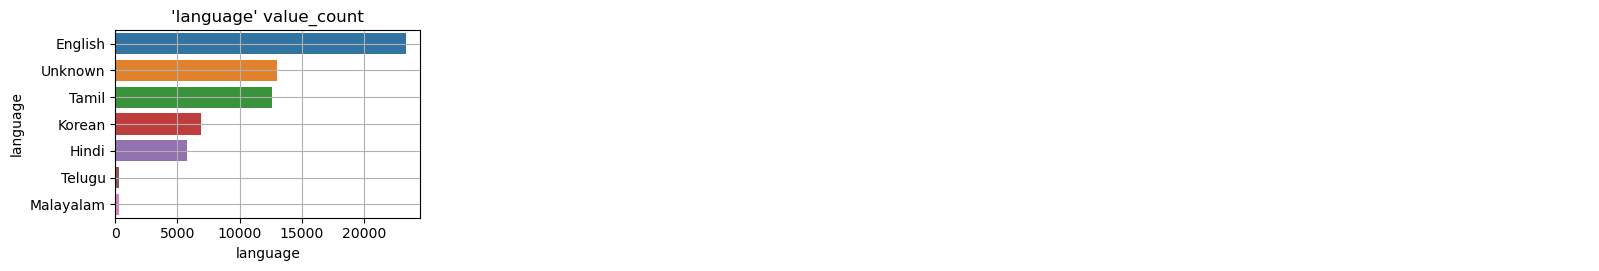

In [170]:
# Set the number of plots per row
plots_per_row = 4

# Calculate the number of rows required
nrows = int(np.ceil(len(simple_categorical_features) / plots_per_row)) 

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=nrows, ncols=plots_per_row, figsize=(4* plots_per_row, num_rows))
fig.tight_layout(pad=3.0)  # Adjust padding between subplots

# Flatten axes to handle both cases (grid vs single row/column)
axes = axes.flatten()

# Iterate over the columns and axes
c=0
for i, feature_name in enumerate(few_labels_categorical_features):
    c+=1
    if c>=len(simple_categorical_features):
        print("yes")
        break
        
    temp_df = df[feature_name].value_counts().reset_index() # series to df 
    # items are of form 'name of album':34
    ax = axes[i]

    # Prepare data for bar plot

    # x and y expects a <str>. 
    #x=> a col belonging to dataframe 'data' which has your categories 
    #y=> a col belonging to dataframe 'data' that has your count
    # but here hz so reverse
    sns.barplot(data=temp_df,ax=ax,y=feature_name,x="count",orient='h') 
    
    # Rotate x-axis labels for better readability
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Set titles and labels
    ax.set_title(f"'{feature_name}' value_count")
    ax.set_xlabel(feature_name)
    ax.grid()
    

# Hide any unused subplots
for i in range(len(few_labels_categorical_features), len(axes)):
    axes[i].axis('off')

for bar in ax.containers[0]:  # ax.containers[0] contains the bar patches
    ax.bar_label(bar)

# Display the plots
plt.show()


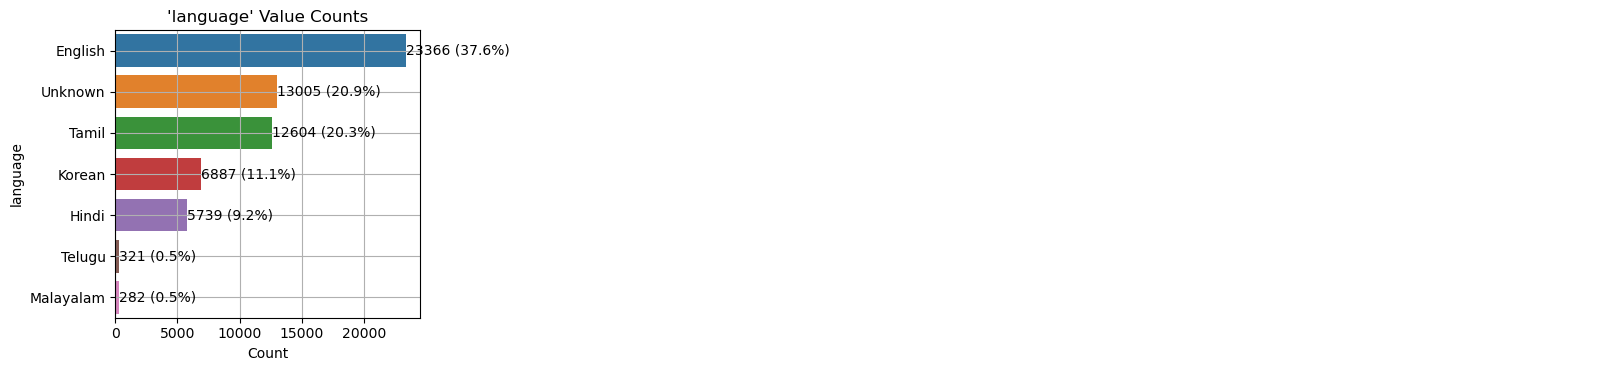

In [174]:
# Set the number of plots per row
plots_per_row = 4

# Calculate the number of rows required
nrows = int(np.ceil(len(simple_categorical_features) / plots_per_row))

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=nrows, ncols=plots_per_row, figsize=(4 * plots_per_row, 4 * nrows))
fig.tight_layout(pad=3.0)

# Flatten axes to handle indexing consistently
axes = axes.flatten()

# Iterate over the columns and axes
for i, feature_name in enumerate(few_labels_categorical_features):

    temp_df = df[feature_name].value_counts().reset_index()  # series to DataFrame
    temp_df.columns = [feature_name, 'count']  # Rename columns for clarity
    ax = axes[i]

    # Plot horizontal bar plot
    sns.barplot(data=temp_df, x='count', y=feature_name, ax=ax, orient='h')

    # Add labels and titles
    ax.set_title(f"'{feature_name}' Value Counts")
    ax.set_xlabel('Count')
    ax.grid()

    total = temp_df['count'].sum()
    # Annotate bars with their counts
    for bar in ax.patches:  # Access bars via patches
        bar_width = bar.get_width()  # Bar width corresponds to the 'count' value
        bar_y = bar.get_y() + bar.get_height() / 2  # Vertical position (center of bar)
        percentage = (bar_width / total) * 100  # Calculate percentage
        ax.text(bar_width + 0.5, bar_y, f'{int(bar_width)} ({percentage:.1f}%)', va='center')  # Add text


# Hide unused subplots
for i in range(len(few_labels_categorical_features), len(axes)):
    axes[i].axis('off')

# Display the plots
plt.show()


#### Problem: The language for many tracks is 'unknown'
> Its common knowledge that 'language' is very important parameter. People are very likely to listen to their own language.
> Unknown category is not a definite category.
> Deletion is not feasable as its the second ranked language label

#### Hypothesing solutions to solve 'unknown' label problem

In [122]:
df[df["language"]=="Unknown"].sample(5)

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
29054,2puzy1gz0nzmVouilaE1zX,'bout you,SEVENTEEN,2022,46,https://i.scdn.co/image/ab67616d0000b273c31e3f...,SEVENTEEN 4th Album Repackage 'SECTOR 17',0.0873,0.710,162427.0,...,1.0,0.2890,-3.090,1.0,0.1050,145.074,4.0,0.943,https://open.spotify.com/track/2puzy1gz0nzmVou...,Unknown
36523,1OXQ7VOvFeQPdg82HdHZAB,Minchante Bandey,"Vijay Yesudas, Bhavadharini",2009,0,https://i.scdn.co/image/ab67616d0000b27391af5b...,Minchina Ota,0.2540,0.609,321200.0,...,0.0,0.2940,-7.370,0.0,0.0571,117.842,4.0,0.747,https://open.spotify.com/track/1OXQ7VOvFeQPdg8...,Unknown
16455,4SVSvqnzflGjAOqXqGJ0st,Toh Mein,Ankit Tiwari,2021,10,https://i.scdn.co/image/ab67616d0000b273f5632b...,Badnaam,0.2500,0.472,342857.0,...,2.0,0.0775,-7.928,0.0,0.0347,139.798,4.0,0.269,https://open.spotify.com/track/4SVSvqnzflGjAOq...,Unknown
1302,763jze9Yxf3Jg1AY8THsd3,"Wrong Pannadha (From ""Saindhav"")","Santhosh Narayanan, Gana Francis",2023,8,https://i.scdn.co/image/ab67616d0000b2732cb0fe...,"Wrong Pannadha (From ""Saindhav"")",0.2090,0.884,217500.0,...,11.0,0.0852,-5.266,0.0,0.1590,128.055,4.0,0.581,https://open.spotify.com/track/763jze9Yxf3Jg1A...,Unknown
10907,4o7IgsAWoKF7UZaklV0mMx,"Moongil Thottam (From ""Kadal"")","A.R. Rahman, Abhay Jodhpurkar, Harini",2017,1,https://i.scdn.co/image/ab67616d0000b27352182f...,Summer Acoustic - Tamil,0.8910,0.501,275093.0,...,7.0,0.1010,-11.093,1.0,0.0291,129.871,3.0,0.286,https://open.spotify.com/track/4o7IgsAWoKF7UZa...,Unknown


In [121]:
df[df["track_name"].str.contains("unakku thaan",case=False,na=False)]

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
1258,7xnSWKXH8XVc8vML9132SZ,Unakku Thaan,"Santhosh Narayanan, Dhvani Kailas",2023,70,https://i.scdn.co/image/ab67616d0000b27368b8c8...,Chithha (Original Motion Picture Soundtrack),0.875,0.578,216214.0,...,1.0,0.0973,-5.439,0.0,0.0304,139.64,3.0,0.559,https://open.spotify.com/track/7xnSWKXH8XVc8vM...,Unknown
1259,4H1FLy4H7nS9wy9gg9JeFQ,"Unakku Thaan - From ""Chithha""","Santhosh Narayanan, Dhvani Kailas, Vivek",2023,66,https://i.scdn.co/image/ab67616d0000b273582001...,"Unakku Thaan (From ""Chithha"")",0.875,0.578,216214.0,...,1.0,0.0973,-5.439,0.0,0.0304,139.64,3.0,0.559,https://open.spotify.com/track/4H1FLy4H7nS9wy9...,Unknown


#### Proposition: We can guess the language of the song by using the artist. An artist typically performs predominantly in one language  

In [126]:
df[df["track_name"].str.contains("toh mein",case=False,na=False)]

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
16455,4SVSvqnzflGjAOqXqGJ0st,Toh Mein,Ankit Tiwari,2021,10,https://i.scdn.co/image/ab67616d0000b273f5632b...,Badnaam,0.25,0.472,342857.0,...,2.0,0.0775,-7.928,0.0,0.0347,139.798,4.0,0.269,https://open.spotify.com/track/4SVSvqnzflGjAOq...,Unknown


In [127]:
df['artist_name']

0                                      Anirudh Ravichander
1        Anirudh Ravichander, Pravin Mani, Vaishali Sri...
2                 Anirudh Ravichander, Anivee, Alvin Bruno
3        Anirudh Ravichander, Bharath Sankar, Kabilan, ...
4        Anirudh Ravichander, Benny Dayal, Leon James, ...
                               ...                        
62312    Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...
62313    A H Kaashif, Navakkarai Naveen Prabanjam, Asal...
62314           Rakesh Ambigapathy, Asal Kolaar, MC Vickey
62315            Asal Kolaar, Priyadarshan Balasubramanian
62316    Harshavardhan Rameshwar, G. V. Prakash, Dharma...
Name: artist_name, Length: 62204, dtype: object

#### Problem: Artist name has composite values

In [128]:
df[df["track_name"].str.contains("toh mein",case=False,na=False)]

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
16455,4SVSvqnzflGjAOqXqGJ0st,Toh Mein,Ankit Tiwari,2021,10,https://i.scdn.co/image/ab67616d0000b273f5632b...,Badnaam,0.25,0.472,342857.0,...,2.0,0.0775,-7.928,0.0,0.0347,139.798,4.0,0.269,https://open.spotify.com/track/4SVSvqnzflGjAOq...,Unknown


In [130]:
df[df["album_name"].str.contains("Chittha",case=False,na=False)]

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language


In [137]:
df[]
df['artist_name'][df["language"]=="Unknown"].str.split(",")

1254     [Santhosh Narayanan,  Shree Mani,  Abhishek Ma...
1255                 [Santhosh Narayanan,  Navz-47,  SVDP]
1256                   [Santhosh Narayanan,  Gana Francis]
1257                   [Santhosh Narayanan,  Dhee,  Vivek]
1258                  [Santhosh Narayanan,  Dhvani Kailas]
                               ...                        
37253                                     [Vishal Dadlani]
37254                                     [Vishal Dadlani]
37255                             [Vishal Dadlani,  Shivi]
37256                                     [Vishal Dadlani]
37266    [Vishal and Sheykhar,  Shilpa Rao,  Caralisa M...
Name: artist_name, Length: 13005, dtype: object

In [138]:
df['artist_name'][df["language"]=="Unknown"].str.split(",").explode().str.strip()

1254     Santhosh Narayanan
1254             Shree Mani
1254        Abhishek Martyn
1255     Santhosh Narayanan
1255                Navz-47
                ...        
37266            Shilpa Rao
37266     Caralisa Monteiro
37266        Vishal Dadlani
37266      Shekhar Ravjiani
37266                Kumaar
Name: artist_name, Length: 25271, dtype: object

In [140]:
df['artist_name'][df["language"]=="Unknown"].str.split(",").explode().str.strip().value_counts()


artist_name
A.R. Rahman                       2499
Shankar Mahadevan                 2400
Shreya Ghoshal                    2018
Vijay Yesudas                      841
Thaman S                           665
                                  ... 
Rap: Written & Sung by BOHEMIA       1
Dot.                                 1
Arish B                              1
Tejas                                1
Rishaan Patil                        1
Name: count, Length: 2539, dtype: int64

In [143]:
'''
These artists have the most unknown language songs.
lets try to compare this with how many of their songs are NOT unknown 
'''

df['artist_name'].str.split(",").explode().str.strip().value_counts()


artist_name
Ilaiyaraaja                3943
A.R. Rahman                2771
Shreya Ghoshal             2618
Shankar Mahadevan          2577
Yuvan Shankar Raja         1916
                           ... 
Johnny Rez                    1
Makk Riverdale                1
Menaxe Ru                     1
RI TWICE                      1
Dharmaseelan Udaiyappan       1
Name: count, Length: 8016, dtype: int64

In [146]:
all_songs_count = df['artist_name'].str.split(",").explode().str.strip().value_counts()
unlabelled_songs_count = df['artist_name'][df["language"] == "Unknown"].str.split(",").explode().str.strip().value_counts()

all_songs_df = all_songs_count.rename('total_songs').reset_index()
unlabelled_songs_df = unlabelled_songs_count.rename('unlabelled_songs').reset_index()

# Merge both on artist name
combined_df = pd.merge(all_songs_df, unlabelled_songs_df, how='left', on='artist_name')

# Fill NaN for artists with no unlabelled songs
combined_df['unlabelled_songs'] = combined_df['unlabelled_songs'].fillna(0).astype(int)
display(combined_df)

,artist_name,total_songs,unlabelled_songs
0,Ilaiyaraaja,3943,1
1,A.R. Rahman,2771,2499
2,Shreya Ghoshal,2618,2018
3,Shankar Mahadevan,2577,2400
4,Yuvan Shankar Raja,1916,0
...,...,...,...
8011,Johnny Rez,1,0
8012,Makk Riverdale,1,0
8013,Menaxe Ru,1,0
8014,RI TWICE,1,0


In [200]:
temp = combined_df[['artist_name', 'total_songs', 'unlabelled_songs']].copy()
temp['unlabelled_percentage'] =  (combined_df['unlabelled_songs'] / combined_df['total_songs'])
display(temp.head(100))

,artist_name,total_songs,unlabelled_songs,unlabelled_percentage
0,Ilaiyaraaja,3943,1,0.000254
1,A.R. Rahman,2771,2499,0.901840
2,Shreya Ghoshal,2618,2018,0.770817
3,Shankar Mahadevan,2577,2400,0.931315
4,Yuvan Shankar Raja,1916,0,0.000000
...,...,...,...,...
95,Nathaniel Blume,199,0,0.000000
96,Udit Narayan,198,122,0.616162
97,Shweta Mohan,198,102,0.515152
98,Nakash Aziz,192,22,0.114583


In [201]:
temp.sort_values(by="total_songs",ascending=False)

,artist_name,total_songs,unlabelled_songs,unlabelled_percentage
0,Ilaiyaraaja,3943,1,0.000254
1,A.R. Rahman,2771,2499,0.901840
2,Shreya Ghoshal,2618,2018,0.770817
3,Shankar Mahadevan,2577,2400,0.931315
4,Yuvan Shankar Raja,1916,0,0.000000
...,...,...,...,...
5349,G.I JOE,1,0,0.000000
5350,RON Sizzle,1,0,0.000000
5351,Jooba LOC,1,0,0.000000
5352,Rxollinstone,1,0,0.000000


In [202]:
temp=temp.sort_values(by="total_songs",ascending=False)

In [203]:
temp["unlabelled_songs"].sum()/temp["total_songs"].sum()

0.22107813976274626

In [219]:
display(temptopn[temptopn["unlabelled_percentage"]>=.9])
n=300
cutoff_threshold=.3


temptopn=temp.head(n)
a=len(temptopn[temptopn["unlabelled_percentage"]>=cutoff_threshold])
b=len(temptopn)
aha(f"{a} out of top {b} artists have > {cutoff_threshold*100} % of their songs unlabelled")


,artist_name,total_songs,unlabelled_songs,unlabelled_percentage
1,A.R. Rahman,2771,2499,0.901840
3,Shankar Mahadevan,2577,2400,0.931315
49,Devi Sri Prasad,446,409,0.917040
57,Shaan,395,359,0.908861
68,Vidyasagar,290,288,0.993103
...,...,...,...,...
3184,Sashaa Thirupati,2,2,1.000000
3127,Sreejith Edavana,2,2,1.000000
3154,Akshay Vairagi,2,2,1.000000
3150,Kanakavva,2,2,1.000000


#### deadend- Cannot use artist name to sort unlabelled songs since unlabelled songs span a huge percentage of their tracks (above 50%)

#### proposition 2- An albums generally have all their songs in the same language...

In [221]:
df['album_name'].value_counts()

album_name
Nowhere to Hide (Unabridged)                                                                                                                  186
Cottage by the Sea [A BRAND NEW pulse-pounding, gripping psychological thriller from TOP TEN BESTSELLER Keri Beevis for 2024 (Unabridged)]    144
The Summer House [The BRAND NEW addictive psychological thriller from the bestselling author of THE SLEEPOVER (Unabridged)]                   140
The Boat House [The BRAND NEW page-turning psychological thriller from TOP 10 BESTSELLER Keri Beevis for 2023 (Unabridged)]                   115
Dawn FM (Alternate World)                                                                                                                      83
                                                                                                                                             ... 
Perfect Symphony (Ed Sheeran & Andrea Bocelli)                                                                   

In [229]:
temp=df["album_name"].value_counts()
temp

album_name
Nowhere to Hide (Unabridged)                                                                                                                  186
Cottage by the Sea [A BRAND NEW pulse-pounding, gripping psychological thriller from TOP TEN BESTSELLER Keri Beevis for 2024 (Unabridged)]    144
The Summer House [The BRAND NEW addictive psychological thriller from the bestselling author of THE SLEEPOVER (Unabridged)]                   140
The Boat House [The BRAND NEW page-turning psychological thriller from TOP 10 BESTSELLER Keri Beevis for 2023 (Unabridged)]                   115
Dawn FM (Alternate World)                                                                                                                      83
                                                                                                                                             ... 
Perfect Symphony (Ed Sheeran & Andrea Bocelli)                                                                   

In [233]:
dfgroup_albums=df.groupby(by="album_name")

In [239]:
display(dfgroup_albums.get_group("Nowhere to Hide (Unabridged)").head())

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
61236,1X7S3CtJbLQQk741k2Qn3y,Chapter 126 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.634,0.668,188233.0,...,5.0,0.1340,-20.587,0.0,0.952,76.112,5.0,0.510,https://open.spotify.com/track/1X7S3CtJbLQQk74...,English
61237,2tvwx7xNPVCMfCIHxCWUaz,Chapter 123 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.245,0.714,183928.0,...,1.0,0.0731,-18.736,1.0,0.910,129.259,3.0,0.186,https://open.spotify.com/track/2tvwx7xNPVCMfCI...,English
61238,0QQ65ZKSpcPBqFJKchXXOJ,Chapter 21 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.525,0.691,184355.0,...,1.0,0.2200,-22.068,1.0,0.924,102.799,4.0,0.384,https://open.spotify.com/track/0QQ65ZKSpcPBqFJ...,English
61239,07OLyusB6k27evtMoFQznE,Chapter 106 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.402,0.718,183187.0,...,1.0,0.0931,-20.693,1.0,0.919,124.300,5.0,0.346,https://open.spotify.com/track/07OLyusB6k27evt...,English
61240,2W9URv5cwuymrfMh96xxM8,Chapter 149 - Nowhere to Hide,"Keri Beevis, Shakira Shute",2024,0,https://i.scdn.co/image/ab67616d0000b273bf257e...,Nowhere to Hide (Unabridged),0.451,0.703,183891.0,...,1.0,0.1710,-21.501,1.0,0.947,83.845,4.0,0.337,https://open.spotify.com/track/2W9URv5cwuymrfM...,English


In [266]:
album_languages=df.groupby(by="album_name")['language'].apply(list).reset_index()
display(album_languages)

,album_name,language
0,"""...von Bach bis AC/DC""",[English]
1,"""Enakke Enakkaa"" Love Songs","[Unknown, Unknown]"
2,"""Ennuyire"" Romantic Songs","[Tamil, Unknown, Tamil]"
3,#1 Trending Hits,"[Unknown, Hindi, Hindi, Hindi, Unknown]"
4,#3,[English]
...,...,...
19887,선생님 좋은 밤이예요 Original Television Soundtrack,"[Korean, Korean]"
19888,쇼핑왕 루이 Shopping King Louie (Music from the Kor...,"[Korean, Korean]"
19889,"쏘리 쏘리 Sorry, Sorry - The 3rd Album","[Korean, Korean, Korean, Korean, Korean, Korea..."
19890,하지 말라면 더 하고 19 Part.1,"[Korean, Korean]"


In [276]:
album_languages["n_Unknown"]=album_languages["language"].apply(lambda x: list.count(x,"Unknown"))
album_languages["n_notUnknown"]=album_languages["language"].apply(lambda x: len(x)-list.count(x,"Unknown"))
album_languages["n_tracks"]=album_languages["language"].apply(lambda x: len(x))
display(album_languages)

,album_name,language,n_Unknown,n_notUnknown,n_tracks
0,"""...von Bach bis AC/DC""",[English],0,1,1
1,"""Enakke Enakkaa"" Love Songs","[Unknown, Unknown]",2,0,2
2,"""Ennuyire"" Romantic Songs","[Tamil, Unknown, Tamil]",1,2,3
3,#1 Trending Hits,"[Unknown, Hindi, Hindi, Hindi, Unknown]",2,3,5
4,#3,[English],0,1,1
...,...,...,...,...,...
19887,선생님 좋은 밤이예요 Original Television Soundtrack,"[Korean, Korean]",0,2,2
19888,쇼핑왕 루이 Shopping King Louie (Music from the Kor...,"[Korean, Korean]",0,2,2
19889,"쏘리 쏘리 Sorry, Sorry - The 3rd Album","[Korean, Korean, Korean, Korean, Korean, Korea...",0,12,12
19890,하지 말라면 더 하고 19 Part.1,"[Korean, Korean]",0,2,2


In [294]:
album_languages["n_Unknown"]=album_languages["language"].apply(lambda x: x.count("Unknown"))
#album_languages["problem_areas"]=album_languages["n_Unknown"].apply(lambda x: np.nan if x>0 else x)
album_languages["n_both"]=album_languages["language"].apply(lambda x: (x.count("Unknown"),len(x)-x.count("Unknown")))
display(album_languages["n_both"])


#plt.figure(figsize=(10, 10))
#sns.heatmap(album_languages["problem_areas","problem_areas1"].isnull().to_frame(), annot=False, cbar=False)
#plt.title("Heatmap of Problem Areas (Albums with 'Unknown' Language)")
#plt.show()

0         (0, 1)
1         (2, 0)
2         (1, 2)
3         (2, 3)
4         (0, 1)
          ...   
19887     (0, 2)
19888     (0, 2)
19889    (0, 12)
19890     (0, 2)
19891     (0, 2)
Name: n_both, Length: 19892, dtype: object

In [404]:
def conditions_to_pass_proposition2(x):
    unique_languages=len(list(set(x)))
    n_Unknown=x.count("Unknown")
    n_Known=len(x)-x.count("Unknown")
    
    return n_Unknown>=1 and unique_languages==2
        
album_languages["oneplus_Unknown_and_oneKnown"]=album_languages["language"].apply(conditions_to_pass_proposition2)

print(f'n Albums with 1+ Unknown and 1 known={album_languages["oneplus_Unknown_and_oneKnown"].sum()}')


n Albums with 1+ Unknown and 1 known=974


In [413]:
#random sample examples just for random testing
album_languages[["album_name","language","oneplus_Unknown_and_oneKnown"]][album_languages["oneplus_Unknown_and_oneKnown"]].sample(3)

,album_name,language,oneplus_Unknown_and_oneKnown
2257,Best Of Varun Dhawan - Birthday Special,"[Unknown, Hindi, Hindi]",True
1052,All in All Azhagu Raja (Original Motion Pictur...,"[Unknown, Unknown, Unknown, Unknown, Hindi]",True
15263,Simmba,"[Unknown, Hindi]",True


Comment: This proposition seems to work well. Hence will apply languages.

In [414]:
#Apply

def predict_language_using_proposition2(languages):
    # Check if the condition is met
    if languages.count("Unknown") >= 1 and len(set(languages)) == 2:
        # Identify the language other than "Unknown"
        unique_languages = set(languages)
        unique_languages.discard("Unknown")  # Remove "Unknown"
        return list(unique_languages)[0]  # Return the other language
    return np.NaN # If condition is not met, return NaN

album_languages["prediction_by_proposition2"]=album_languages["language"].apply(predict_language_using_proposition2)
album_languages["prediction_by_proposition2"]

0          NaN
1          NaN
2        Tamil
3        Hindi
4          NaN
         ...  
19887      NaN
19888      NaN
19889      NaN
19890      NaN
19891      NaN
Name: prediction_by_proposition2, Length: 19892, dtype: object

In [430]:
album_languages[["album_name","language","prediction_by_proposition2"]][album_languages["prediction_by_proposition2"].notnull()].sample(3)

,album_name,language,prediction_by_proposition2
16414,Taramani (Original Motion Picture Soundtrack),"[Tamil, Tamil, Unknown]",Tamil
17258,Thirudiya Idhayathai - Love Sad Songs,"[Unknown, Tamil]",Tamil
6564,Hey Jaleela Kanvarlala - Tribute to Rebel Star...,"[Tamil, Unknown]",Tamil


In [265]:
#remove duplicate occurence of same languages
#album_languages["language"]=album_languages["language"].apply(lambda x:list(set(x)))

#count unknown
album_language["n_unknownlanguage"]=album_languages["language"].apply(lambda x:list.count("Unknown"))
display(album_languages)

TypeError: descriptor 'count' for 'list' objects doesn't apply to a 'str' object

In [262]:
album_languages[album_languages["language"].apply(lambda x: "Unknown" in x and len(x)==4)]

,album_name,language
2293,Best of 2017,"[English, Tamil, Hindi, Unknown]"
12621,Payanangal (Bon Voyage),"[English, Tamil, Hindi, Unknown]"
12878,Playback: Dance Machi Dance - The Ultimate Tam...,"[English, Unknown, Tamil, Hindi]"
16717,Thank You,"[Korean, English, Hindi, Unknown]"


974 albums with 2 languages unknown eg: [Tamil,unknown] -> these albums can be mapped to a single language
63 albums with 3 languages unknown eg: [Tamil,Hindi,unknown]
4 albums with 

In [ ]:
album_languages['languages_list'] = album_languages['languages_list'].apply(lambda x: list(set(x)))

In [ ]:
# Sample data: 3 features with random values
data = {
    'Feature A': np.random.randint(1, 10, 10),
    'Feature B': np.random.randint(10, 20, 10),
    'Feature C': np.random.randint(20, 30, 10)
}

data= 

# Number of subplots
nrows, ncols = 1, 3  # 1 row, 3 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5))

# Plot each feature
for i, (feature, values) in enumerate(axes.flatten()):
    ax = axes[i]  # Access the corresponding subplot
    data= df_categorical_data[feature_name].value_counts().to_dict()
    ax.bar(range(len(values)), values)
    ax.set_title(feature)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

#### Handling'artist_name'
artist name is a composite label eg "Artist A, Artist B, Artist C".

My opinion: It will be necessary to analyse them individually (and not as single unit).

In [ ]:
display(df['artist_name'].value_counts())
display(df['artist_name'].nunique()) 

But these are composite values, so we need to make a 1hot encoded sparse matrix

In [ ]:
'''
artists=set()
for i in df["artist_name"]:
    temp=i.split(",")
    artists.update(temp)
    

pd.DataFrame(artists)
'''

In [154]:
artists_frequency={}
for i in df["artist_name"]:
    temp=i.split(",")
    for j in temp:
        if j in artists_frequency:
            artists_frequency[j]+=1
        else:
            artists_frequency[j]=1
    
artists_frequency_df=pd.DataFrame(list(artists_frequency.items()), columns=["Artist", "Frequency"])
artists_frequency_df.sort_values(by="Frequency", ascending=False, inplace=True)

artists_frequency_df

,Artist,Frequency
5231,Ilaiyaraaja,3782
2125,A.R. Rahman,2757
3115,Shankar Mahadevan,2214
3021,Shreya Ghoshal,1963
438,Yuvan Shankar Raja,1707
...,...,...
4318,Shaswati Fukan,1
4316,Nafees Alam,1
4315,Yogesh,1
4312,R3lic AT2,1


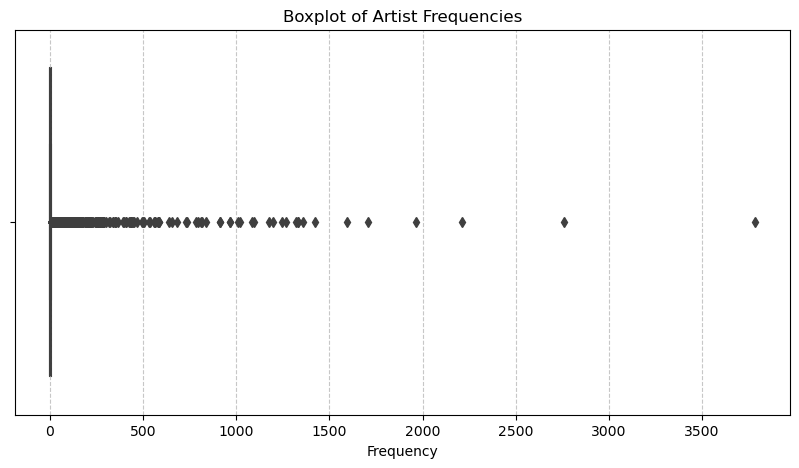

In [155]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=artists_frequency_df['Frequency'])

plt.title("Boxplot of Artist Frequencies")
plt.xlabel("Frequency")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [156]:
threshold=0.7
artists_frequency_df['Frequency'].quantile(threshold)  # 75th percentile
artists_frequency_df[artists_frequency_df['Frequency']>artists_frequency_df['Frequency'].quantile(threshold)]

,Artist,Frequency
5231,Ilaiyaraaja,3782
2125,A.R. Rahman,2757
3115,Shankar Mahadevan,2214
3021,Shreya Ghoshal,1963
438,Yuvan Shankar Raja,1707
...,...,...
2882,Farhan Akhtar,4
7833,Honor of Kings,4
949,Ko Sesha,4
272,Karthika Vaidyanathan,4


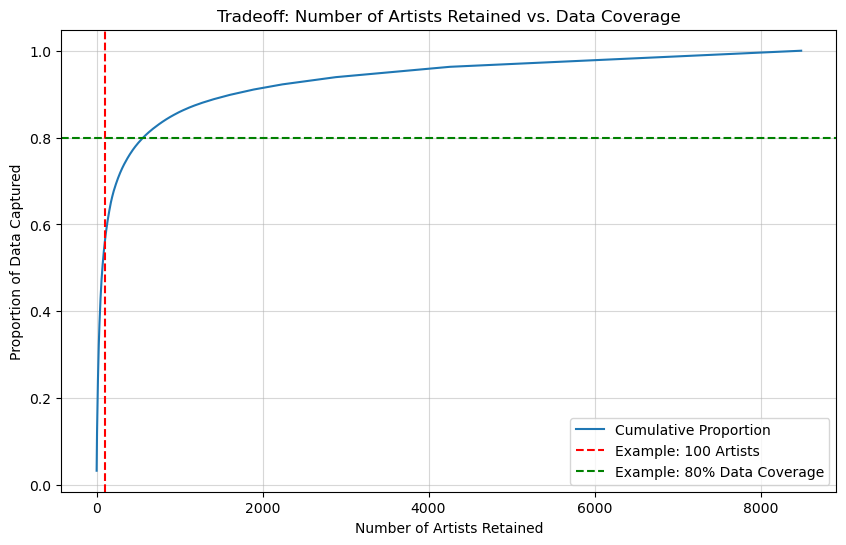

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Sort artists by frequency
sorted_frequencies = artists_frequency_df['Frequency'].sort_values(ascending=False).values

# Cumulative sum of frequencies
cumulative_frequencies = np.cumsum(sorted_frequencies)

# Proportion of total frequency captured
total_frequency = cumulative_frequencies[-1]
cumulative_proportion = cumulative_frequencies / total_frequency

# Number of artists
num_artists = np.arange(1, len(sorted_frequencies) + 1)

# Plot the tradeoff
plt.figure(figsize=(10, 6))
plt.plot(num_artists, cumulative_proportion, label="Cumulative Proportion")
plt.axvline(x=100, color='r', linestyle='--', label="Example: 100 Artists")
plt.axhline(y=0.8, color='g', linestyle='--', label="Example: 80% Data Coverage")

plt.title("Tradeoff: Number of Artists Retained vs. Data Coverage")
plt.xlabel("Number of Artists Retained")
plt.ylabel("Proportion of Data Captured")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

#matrix_artist_name = df['artist_name'].str.get_dummies(sep=',')

{'Nowhere to Hide (Unabridged)': 186,
 'Cottage by the Sea [A BRAND NEW pulse-pounding, gripping psychological thriller from TOP TEN BESTSELLER Keri Beevis for 2024 (Unabridged)]': 144,
 'The Summer House [The BRAND NEW addictive psychological thriller from the bestselling author of THE SLEEPOVER (Unabridged)]': 140,
 'The Boat House [The BRAND NEW page-turning psychological thriller from TOP 10 BESTSELLER Keri Beevis for 2023 (Unabridged)]': 115,
 'Dawn FM (Alternate World)': 83,
 'Hybrid Theory (20th Anniversary Edition)': 79,
 'After Hours (Deluxe)': 70,
 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]': 68,
 'Reanimation': 63,
 "Red (Taylor's Version)": 60,
 'The Essential Hits of A R Rahman': 57,
 'A Curious Case Of Drama': 54,
 'Playback: Justu Kuthu - Best Tamil Folk Songs': 51,
 '50 Years of the Piano Man': 50,
 'Playback: Madras Melodies - Soulful Tamil Melodies': 50,
 'Finally Enough Love: 50 Number Ones': 50,
 'Back To The Future Part III

### Validity of 'language' attribute values
Going in with the assumption that the labels are correct apart from unknown.
Further explore the 'unknown' column

In [ ]:
df[df["language"]=="Unknown"]

#### 'album_name'

In [ ]:
analyse_categorical_feature("album_name")

# Data Preprocessing

In [ ]:
df_numerical_cols_data

### Handling Missing Values
Dealing with empty or partially empty records 

In [ ]:
missing_values=df.isnull().sum()
missing_values

### Handling Outliers 
Data exists but you suspect is wrong/ spammy

### Feature Engineering

- Which columns to pick and not pick?
- Any duplicate/ highly correlated columns?
- Any column with heavy missing values?
- Can I synthesize a new feature using existing columns that can serve more utility?
- If the values aren't spread out well in the boxplot but rather focused to 1 spot... then variance is ~0, maybe its a suboptimal feature

In [ ]:
####

In [ ]:
corr_matrix=df_numerical_cols_data.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

# correlation is scale invariant, no need to normalise first

In [ ]:
_corr_values=corr_matrix.values.flatten()
_corr_values=_corr_values[_corr_values != 1]

plt.figure(figsize=(5,4))
plt.violinplot(_corrm_values)
plt.boxplot(_corrm_values)
plt.plot()

In [ ]:
'''
qq("Intent: Now, Im determining the appropriate threshold for cuttoff.")

lower_bound = np.quantile(_corr_values, 0.05)  # 5th percentile
upper_bound = np.quantile(_corr_values, 0.95)  # 95th percentile

finding(f"Suggested thresholds based on quantiles: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")

mean_corr = np.mean(_corr_values)
std_corr = np.std(_corr_values)

# Set threshold as 1 standard deviation from the mean
lower_bound = mean_corr - 1.5* std_corr
upper_bound = mean_corr + 1.5* std_corr

finding(f"Suggested thresholds based on mean ± std: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")
'''

In [ ]:
qq("Typical correlation thresholds used to determine feature redundancy are -0.8 to +0.8. Using those as cutoff thresholds...")
lower_bound=-.8
upper_bound=+.8

In [ ]:
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
# Filter correlations using the upper triangle
correlated_pairs = corr_matrix.where(upper_triangle).stack().reset_index()
correlated_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter for correlations outside the bounds
correlated_pairs = correlated_pairs[
    (correlated_pairs['Correlation'] > upper_bound) | 
    (correlated_pairs['Correlation'] < lower_bound)
]

# Display results
correlated_pairs.sort_values(by="Correlation", ascending=False, inplace=True)

finding("The correlated pairs are below.")
display(correlated_pairs)

In [ ]:
conclusion(f" No two features have |correlation|>0.8. \
So there are no redundant columns. All numeric columns are contributing significant variance and hence will remain.")


In [ ]:
# take time hypothesizing which features are important and which are not manually
# dont restrict yourself to this df, maybe another dataset can help?
# which features do I think represent the data well.
# are those features available here?
# what is the ultimate purpose of this recommendation system?
# just because you have a feature doesnt make it useful eg: primary key like track_id
# numerical features best for distance based algorithms
# 


In [ ]:
qq("Intent: Auto-dropping redundant columns.")
columns_to_drop= [] # or edit manual
qq(f"going to remove the following columns {columns_to_drop}")
df_cleaned=df_numerical_cols_data.drop(columns=columns_to_drop)

conclusion("The df after feature engineering completion is...")
df_cleaned

In [ ]:
'''
plt.figure(figsize=(12, 6))
sns.boxplot(data=df20_numerical_data)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()
'''

In [ ]:
'''
df1_numerical_data.plot(kind='density', subplots=True, layout=(3, 2), figsize=(15, 12), sharex=False)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()

'''

In [ ]:
'''
df1_numerical_data.plot(
    kind='density', 
    subplots=True, 
    layout=(5, 3),  # Adjust rows and columns for 15 features
    figsize=(15, 12), 
    sharex=False
)
plt.suptitle("KDE of Numerical Features", fontsize=16)
plt.show()
'''

In [ ]:
#selected_features=["danceability","energy","valence","tempo","acousticness","loudness","speechiness","time_signature"]
selected_features=df_cleaned.columns

print(f"selected features are {selected_features}")

### Data Preprocessing- Normalization

In [ ]:
qq("Going to use Min Max Scaler to Normalize all values between 0 and 1")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
matrix_normalised_features=scaler.fit_transform(df20_numerical_data[selected_features])
print(matrix_normalised_features)

matrix_normalised_features

In [ ]:
# Now all selected features values range from 0 to 1.

plt.figure(figsize=(12, 6))
sns.boxplot(data=matrix_normalised_features)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

### Obtained Normalised DF. df30. This dataset is cleaned and ready to be trained on.

In [ ]:
#attach column names back to df
df30_normalised=pd.DataFrame(matrix_normalised_features,columns=selected_features)
df30_normalised

In [ ]:
# find similarities between the songs using cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
'''
similarity_matrix=cosine_similarity(df3_normalised)
similarity_matrix
'''
#60000 rows takes 2 minutes but takes up whole RAM, bad idea

### TRying out a sample subset of the data

In [ ]:
sdf = df30_normalised.sample(n=10000, random_state=42)
sdf

# Building the Model

### Cosine Similarity Matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
matrix_csm=cosine_similarity(sdf)

In [ ]:
print(matrix_csm)

In [ ]:
# Convert to DataFrame for easier viewing
df40_sm = pd.DataFrame(matrix_csm,index=sdf.index, columns=sdf.index)

In [ ]:
df40_sm

In [ ]:
def recommend_songs(track_id,similarity_matrix,top_n=4):
    if track_id not in similarity_matrix.index:
        return "Track id unavailable in sm"

    similarity_scores=similarity_matrix.loc[track_id] 
    # will return a kinda dict with

    similar_tracks = similarity_scores.sort_values(ascending=False).iloc[1:top_n+1]

    return similar_tracks.index

In [ ]:
your_song_id=10371
new_ids=recommend_songs(your_song_id,df40_sm,5)
new_ids

In [ ]:
your_song_details=df.loc[your_song_id,["track_name","artist_name"]]
display(your_song_details)
details = df.loc[new_ids, ["track_name", "artist_name"]]
details

In [ ]:
#Export

df40_sm.to_pickle("export_similarity_matrix.pkl")
df.to_csv("export_dataset.csv", index=False)

In [ ]:
sdf